<a href="https://colab.research.google.com/github/NicolasSocquetJuglard/TP4_ML/blob/main/codeNico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.utils import dataset_utils
from keras.utils import image_utils
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense


In [24]:
import pathlib
from google.colab import drive

In [25]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input

In [27]:
#path toward the images

path = '/content/drive/MyDrive/Colab/cats_and_dogs'
path_train = path + '/train'
path_test = path + '/test'

In [28]:
train_datagen =  keras.preprocessing.image.ImageDataGenerator(
    validation_split = 0.15,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    preprocessing_function = preprocess_input,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        path_train,
        target_size = (300, 300),
        batch_size = 16,
        shuffle = True)

test_generator = test_datagen.flow_from_directory(
        path_test,
        target_size = (300, 300),
        batch_size = 16,
        shuffle = True)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [29]:
base_model_1 = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (300, 300, 3))

In [30]:
#Freezing all layers

for layer in base_model_1.layers:
  layer.trainable = False

In [31]:
x1 = base_model_1.output
x1 = Flatten()(x1)
x1 = Dense(100, activation = 'relu')(x1)
predictions1 = Dense(2, activation='softmax', kernel_initializer='random_uniform')(x1)

In [32]:
#Building model
model1 = Model(inputs = base_model_1.input, outputs = predictions1)

#Compiling model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
Hist = []
Hist.append(model1.fit(x = train_generator, validation_data = test_generator, epochs = 2))

Epoch 1/2
35/35 [==============================] - 223s 6s/step - loss: 0.6565 - accuracy: 0.9120 - val_loss: 0.1314 - val_accuracy: 0.9571
Epoch 2/2
35/35 [==============================] - 215s 6s/step - loss: 0.1205 - accuracy: 0.9749 - val_loss: 0.0655 - val_accuracy: 0.9786


In [43]:
hist1 = Hist[0]

In [34]:
# View all the layers of the network

model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

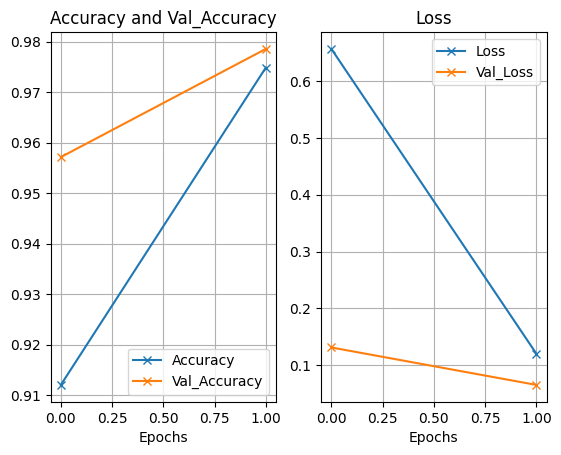

In [44]:
#Evaluating 

acc, val_acc = hist1.history['accuracy'], hist1.history['val_accuracy']
loss, val_loss = hist1.history['loss'], hist1.history['val_loss']

epochs = hist1.epoch

plt.figure()

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-x', label = 'Accuracy')
plt.plot(epochs, val_acc, '-x', label = 'Val_Accuracy')
plt.grid(True)
plt.title("Accuracy and Val_Accuracy")
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-x', label = 'Loss')
plt.plot(epochs, val_loss, '-x', label = 'Val_Loss')
plt.grid(True)
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

Il reste :

-Confusion matrix

-Print metrics such as accuracy, f1-score etc... on test set

Step 2 :

Repeat the step 1 with another model, compare and choose the best model

In [36]:
base_model_2 = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

In [37]:
for layer in base_model_2.layers:
    layer.trainable = False

In [38]:
x2 = base_model_2.output
x2 = keras.layers.Flatten()(x2)
x2 = keras.layers.Dense(100, activation='relu')(x2)
predictions2 = keras.layers.Dense(2, activation='softmax', kernel_initializer='random_uniform')(x2)

In [39]:
#Building model
model2 = Model(inputs = base_model_2.input, outputs = predictions2)

#Compiling model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
# View all the layers of the network

model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0   

In [41]:
Hist.append(model2.fit(x = train_generator, validation_data = test_generator, epochs = 2))

Epoch 1/2
35/35 [==============================] - 855s 25s/step - loss: 0.5056 - accuracy: 0.7953 - val_loss: 0.3468 - val_accuracy: 0.8286
Epoch 2/2
35/35 [==============================] - 858s 25s/step - loss: 0.2068 - accuracy: 0.9138 - val_loss: 0.3872 - val_accuracy: 0.8357


In [45]:
hist2 = Hist[1]

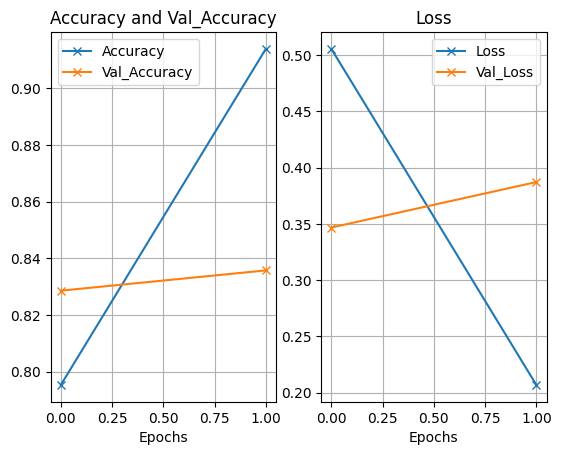

In [46]:
#Evaluating 

acc, val_acc = hist2.history['accuracy'], hist2.history['val_accuracy']
loss, val_loss = hist2.history['loss'], hist2.history['val_loss']

epochs = hist2.epoch

plt.figure()

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-x', label = 'Accuracy')
plt.plot(epochs, val_acc, '-x', label = 'Val_Accuracy')
plt.grid(True)
plt.title("Accuracy and Val_Accuracy")
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-x', label = 'Loss')
plt.plot(epochs, val_loss, '-x', label = 'Val_Loss')
plt.grid(True)
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

In [73]:
#Getting max accuracy for each model, and the epoch for which this accuracy was reached
Acc = [{'model' : hist.model.name, 'max_acc' : np.max(hist.history['val_accuracy']), 'epoch' : hist.history['val_accuracy'].index(np.max(hist.history['val_accuracy']))+1} for hist in Hist]


In [74]:
#Best model
def find_best(e):
  return e['max_acc']

Acc.sort(reverse = True, key = find_best)

print(f"Best model : {Acc[0]['model']}, \nMaximum accuracy of {round(Acc[0]['max_acc'], 5)} happened for epoch number {Acc[0]['epoch']}")

Best model : model_2, 
Maximum accuracy of 0.97857 happened for epoch number 2
